In [25]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import math
import sklearn.datasets
from sklearn.model_selection import train_test_split
import sklearn.tree

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

## 3950 Assignment 1: Part 2

For this assignment we want to use some sort of tree based model to classify the data below. We have a very small training set, so overfitting is a very real concern. 

Some specifics for this assignment:
<ul>
<li>Please paste in any outside functions you may use before submitting. E.g. if you're importing any functions from a util file, paste them in here for this. The reason for this is that it makes it massively easier for me when downloading a submission from everyone. Please put the blocks with those functions before they're called, so I can hit Run All to run the entire workbook. 
<li>Please use the show_eda to control if EDA stuff is shown. I don't really need to see all the EDA stuff (nor do you after you've done it), so we can make it configurable with a variable to speed up time. Please set this FALSE when you submit, so I can run all and see the outcome without histograms etc...
<li>Please ensure that whatever model you end up with is in a variable named best at the end.
<li>Please use some pipeline in prepping the data. The test data is in an identical format to the training data, so whatever pipeline you've created for your training will work for the testing. 
<li>The accuracy scoring will be an average of accuracy and roc_auc. 
<li>Please make the name variable into your name, this will make it easier for me to track scores. 
</ul>

### Grading Metrics
<ul>
<li><b>Pipeline Used - 10pts</b> The data loading needs to be in a pipeline. See the test part for illustration. When testing I'll call your pipe with the new data (format is identical to training), so any prep stuff should be in the pipeline. 
<li><b>Tree Based Model Used - 5pts</b> The model used for classification needs to be some variety of tree. 
<li><b>Accuracy - 5pts</b> The final accuracy acheived. 
<li><b>Clarity and Formatting - 5pts</b> Is it organized and can I read it?
</ul>

For submission, please drop the .ipynb in the dropbox. Again, please make sure everything you need is in that file. 

In [12]:
#Please change to your name.
name = "Ally Ryan"

#Please use this to control EDA. 
show_eda = False

In [13]:
#Load data
df = pd.read_csv("training.csv")
df = df.drop(columns={"id"})
df.sample(5)

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
85,0,0.830,0.749,0.547,0.421,0.175,0.226,0.828,0.697,0.248,...,0.271,0.947,0.260,0.734,0.760,0.279,0.113,0.877,0.478,0.928
91,0,0.846,0.089,0.356,0.501,0.415,0.066,0.622,0.368,0.073,...,0.857,0.150,0.771,0.841,0.519,0.761,0.398,0.832,0.179,0.130
232,1,0.409,0.425,0.779,0.450,0.422,0.983,0.557,0.006,0.336,...,0.760,0.428,0.470,0.645,0.911,0.673,0.890,0.168,0.231,0.291
174,1,0.774,0.093,0.479,0.232,0.432,0.892,0.021,0.041,0.944,...,0.957,0.171,0.236,0.361,0.717,0.388,0.351,0.973,0.258,0.888
190,1,0.979,0.019,0.085,0.265,0.778,0.517,0.153,0.622,0.270,...,0.069,0.562,0.883,0.957,0.313,0.450,0.609,0.862,0.599,0.842


### Starting

For this assignment, you have a small training set, so combatting overfitting is key in being accurate!

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 201 entries, target to var_200
dtypes: float64(200), int64(1)
memory usage: 392.7 KB


8
0.5714285714285714


[Text(153.22857142857143, 410.71999999999997, 'X[177] <= 0.12\ngini = 0.496\nsamples = 187\nvalue = [85, 102]'),
 Text(56.68571428571428, 362.4, 'X[12] <= 0.914\ngini = 0.213\nsamples = 33\nvalue = [4, 29]'),
 Text(28.34285714285714, 314.08, 'X[19] <= 0.891\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(14.17142857142857, 265.76, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(42.51428571428571, 265.76, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(85.02857142857142, 314.08, 'X[150] <= 0.766\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(70.85714285714286, 265.76, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(99.19999999999999, 265.76, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(249.77142857142857, 362.4, 'X[49] <= 0.544\ngini = 0.499\nsamples = 154\nvalue = [81, 73]'),
 Text(166.5142857142857, 314.08, 'X[198] <= 0.769\ngini = 0.472\nsamples = 89\nvalue = [34, 55]'),
 Text(127.54285714285714, 265.76, 'X[173] <= 0.838\ngini = 0.398\nsamples = 73\nvalue = [2

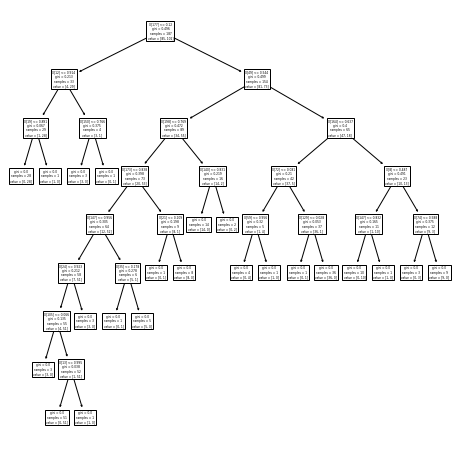

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Trees don't theoretically require dummies, but sklearns implemention does.
df2 = pd.get_dummies(df, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns={"target"}))

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf.get_depth())
print(clf.score(X_test, y_test))
plot_tree(clf)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#Split data as normal
y = np.array(df["target"]).reshape(-1,1)
X = np.array(df.drop(columns={"target"}))
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Build pipeline
pipeline_steps = [('scaler', StandardScaler()),('DT', DecisionTreeClassifier()) ]
pipe = Pipeline(pipeline_steps)
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.6031746031746031

In [16]:
importances = clf.feature_importances_
feat_imp = pd.Series(importances, index=df.drop(columns={"target"}).columns)
feat_imp.sort_values(ascending=False)[0:5]

var_199    0.102250
var_178    0.096032
var_50     0.094244
var_174    0.083722
var_148    0.079169
dtype: float64

In [38]:
clf_ = DecisionTreeClassifier()

path_ = clf_.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas_, impurities_ = path_.ccp_alphas, path_.impurities

In [39]:
clfs_ = []
for ccp_alpha_ in ccp_alphas_:
    clf_ = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha_)
    clf_.fit(X_train, y_train)
    clfs_.append(clf_)

clfs_ = clfs_[:-1]
ccp_alphas_ = ccp_alphas_[:-1]

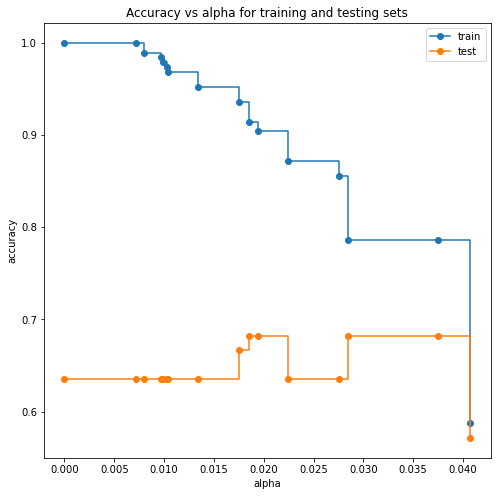

In [40]:
train_scores_ = [clf_.score(X_train, y_train) for clf_ in clfs_]
test_scores_ = [clf_.score(X_test, y_test) for clf_ in clfs_]

fig_, ax_ = plt.subplots()
ax_.set_xlabel("alpha")
ax_.set_ylabel("accuracy")
ax_.set_title("Accuracy vs alpha for training and testing sets")
ax_.plot(ccp_alphas_, train_scores_, marker="o", label="train", drawstyle="steps-post")
ax_.plot(ccp_alphas_, test_scores_, marker="o", label="test", drawstyle="steps-post")
ax_.legend()
plt.show()

9
0.6825396825396826


[Text(169.46666666666664, 413.13599999999997, 'X[177] <= 0.12\ngini = 0.495\nsamples = 187\nvalue = [84, 103]'),
 Text(66.13333333333333, 369.648, 'X[141] <= 0.202\ngini = 0.208\nsamples = 34\nvalue = [4, 30]'),
 Text(33.06666666666666, 326.15999999999997, 'X[70] <= 0.091\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(16.53333333333333, 282.672, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(49.599999999999994, 282.672, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(99.19999999999999, 326.15999999999997, 'X[120] <= 0.981\ngini = 0.064\nsamples = 30\nvalue = [1, 29]'),
 Text(82.66666666666666, 282.672, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(115.73333333333332, 282.672, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(272.79999999999995, 369.648, 'X[49] <= 0.567\ngini = 0.499\nsamples = 153\nvalue = [80, 73]'),
 Text(190.13333333333333, 326.15999999999997, 'X[198] <= 0.781\ngini = 0.477\nsamples = 89\nvalue = [35, 54]'),
 Text(148.79999999999998, 282.672, 'X[173]

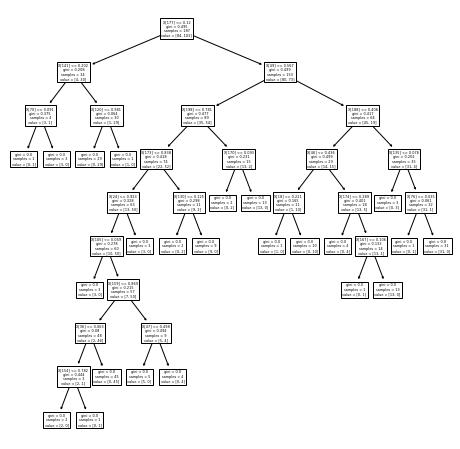

In [42]:
clf_ = DecisionTreeClassifier(ccp_alpha=.003)
clf_ = clf_.fit(X_train, y_train)
print(clf_.get_depth())
print(clf_.score(X_test, y_test))
plot_tree(clf_)

### Finishing

At the conclusion, please name your best model "best". If you look down below in the testing stuff, it should be usable to score as "best". 

You should be able to call it like this and it should work (with whatever data names you have)

In [17]:
print(best.score(X_test, y_test))
print(best)

NameError: name 'best' is not defined

### Testing

Please leave the stuff below as-is in your file. 

This will take your best model and score it with the test data. If you want to test to make sure that yours works, make a copy of the data file and rename it testing.csv, then make sure this runs ok. I will do the same, but the contents of my test file will be different. 

In [ ]:
#Load Test Data
test_df = pd.read_csv("testing.csv")
test_df = test_df.drop(columns={"id"})
#Create tests and score
test_y = np.array(test_df["target"]).reshape(-1,1)
test_X = np.array(test_df.drop(columns={"target"}))

preds = best.predict(test_X)

roc_score = roc_auc_score(test_y, preds)
acc_score = accuracy_score(test_y, preds)

print(roc_score)
print(acc_score)
print(name, np.mean([roc_score, acc_score]))
